<a href="https://colab.research.google.com/github/xilipkoru/estrogen-receptor-alpha-qsar/blob/master/Representaci%C3%B3n_molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación molecular

---

Elaboró:  Mariluz Seseña y Fernanda Saldivar.  Contacto: fer.saldivarg@gmail.com


# Objetivos:



*   Introducir a las  representaciones moleculares  más comunes de compuestos orgánicos de bajo peso molecular y a sus aplicaciones en diversos contextos.
*   Aprender a convertir compuestos entre las distintas representaciones moleculares de  según convenga.
* Introducir al uso de los paquetes `RDKit `y `py3Dmol` para el manejo de estructuras y reacciones químicas.
*  Aplicar los conocimientos aprendidos para comparar estructuras, filtrar bases de datos y visualizar moléculas con características específicas.






# Introducción


Probablemente la descripción más conocida de compuestos es la representación gráfica bidimensional (2D). Actualmente existen muchos programas para ayudar a dibujar estructuras químicas y facilitar el almacenamiento y la interconversión entre formatos de archivos estándar. Algunos de estos programas de software tienen versiones académicas gratuitas como [MarvinSketch](https://chemaxon.com/marvin)  y [ACD/ChemSketch](https://www.acdlabs.com/resources/free-chemistry-software-apps/chemsketch-freeware/), y otros son comerciales como [ChemDraw](https://chemdrawdirect.perkinelmer.cloud/js/sample/index.html), [Schrödinger](https://www.schrodinger.com/) y [MOE](), por nombrar algunos. Las estructuras tridimensionales (3D) también son muy utilizadas, principalmente en el modelado molecular. Estas representaciones proporcionan una herramienta poderosa e intuitiva para comprender muchos aspectos de la química. Sin embargo, estas representaciones tienen limitaciones, especialmente cuando se trata de tareas cotidianas en quimioinformática. Por este motivo, se han desarrollado representaciones lineales que, en principio, ayudan a ahorran espacio de memoria, sirven para el almacenamiento, manejo de datos y procesamiento de grandes cantidades de compuestos.

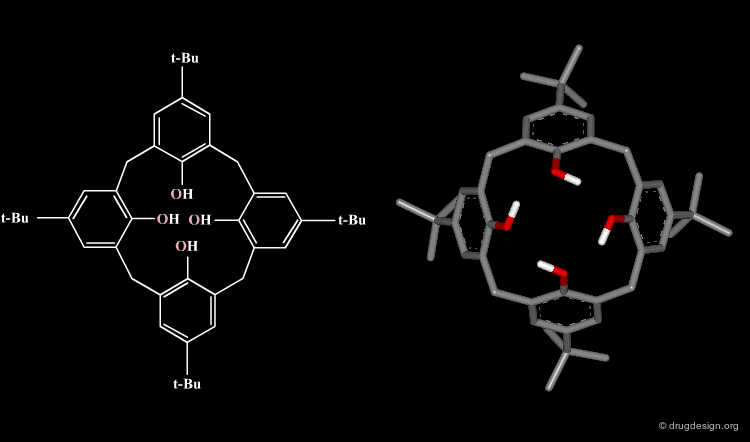

Figura 1. Representación 2D y 3D del calix[4]areno

>## [**Representaciones lineales**](https://doi.org/10.1186/s13321-020-00466-z)


En quimioinformática, la información molecular suele estar representada por notaciones lineales. A continuación, se describen las notaciones lineales más utilizadas que son: SMILES, SMARTS, InChi e InChikeys.

 > [**SMILES**](https://doi.org/10.1021/ci00057a005)





*Simplified Molecular input Line System* (SMILES) captura la estructura de una molécula de forma precisa en forma de cadenas de texto utilizando caracteres alfanuméricos. Permiten un almacenaje eficiente y aceleran el procesamiento de una gran cantidad de moléculas.

Su notación se rige por las siguientes reglas:


1.   Los átomos se representan por su símbolo atómico. Los hidrógenos de átomos saturados no se representan explícitamente.

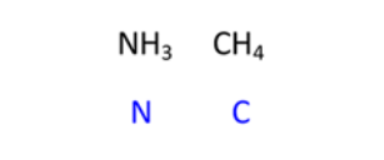

2.   Los átomos vecinos se colocan uno al lado del otro. Los enlaces se representan como sencillo (-), doble (=), triple (#) o aromático (:), generalmente el sencillo y aromático se omiten.

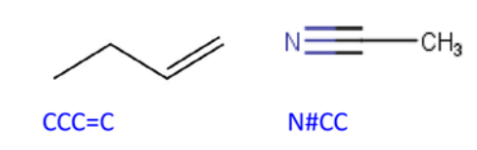

3. Colocar entre paréntesis ramas específicas de la estructura molecular.

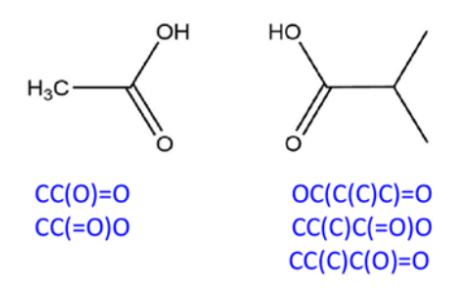


4. Para representar linealmente una estructura cíclica, se "rompe" un enlace en el anillo y los átomos que lo conectan deben poseer a un lado el mismo dígito en la representación textual.

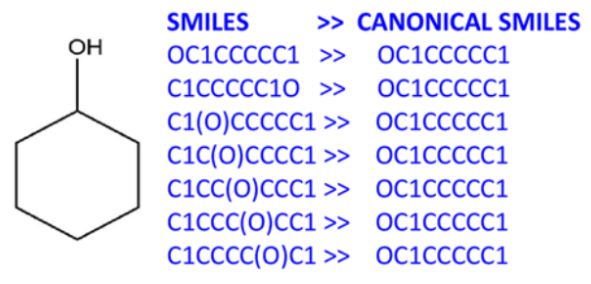
5. Los átomos en anillos aromáticos son señalados por letras minúsculas. Algunas veces hay problemas para la percepción de aromaticidad.

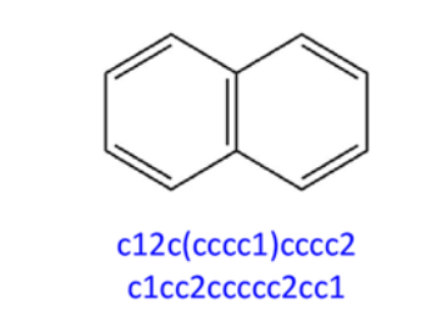


Aunque la notación de SMILES son una forma clara de describir estructuras químicas, pueden existir múltiples representaciones SMILES válidas para el mismo gráfico molecular (visible en la codificación de anillos). Por ese motivo se generaron los SMILES canónicos para garantizar la existencia de una sola representación de un compuesto en la base de datos o identificar compuestos duplicados, pero es dependiente del programa utilizado. Por lo tanto si se emplean, se recomienda generar los SMILES utilizando en un solo programa.

>[**SMARTS**](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)

*SMILES Arbitrary Target specification* (SMARTS) es un lenguaje desarrollado para especificar patrones subestructurales utilizados para relacionar moléculas y reacciones. Se utilizan reglas que son extenciones de SMILES, sin embargo las etiquetas para el átomo y su enlace también incluyen operadores lógicos y otros simbolos especiales que permiten que estos sean más inclusivos.
Se utilizan para encontrar moléculas con una subestructura particular en una base de datos, para filtrar moléculas con subestructuras relacionadas con problemas toxicológicos o que carecen de especificidad (compuestos promiscuos).
SMARTS permite el uso de distintos símbolos para describir las propiedades de átomos y enlaces más allá de lo que provee SMILES.

Debido a que las representaciones de patrones químicos son relativamente nuevas, la cantidad de interfaces donde el usuario puede crear patrones gráficamente es limitada. Ejemplos de editores para manejar la notación SMARTS son MarvinSketch, JSME, SMARTeditor  y el editor web PubChem's Sketcher.

Otro problema que se presenta al escribir SMARTS, es que muchos de los patrones que se escriben coinciden con moléculas adicionales (falsos positivos) y pueden pasar por alto otras (falsos negativos). Los falsos positivos son un problema particular cuando se aplican transformaciones (p. ej. SMIRKS) a moléculas coincidentes, ya que pueden dar como resultado estados exóticos de valencia y carga que no fueron intencionados.



>[**InChI Keys**](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0068-4)

*International Chemical IDentifier* o InChI, fue desarrollado por la IUPAC con el objetivo de establecer una única etiqueta para cada compuesto y facilitar su almacenaje. Resuelve ambiguedades de SMILES, pero son dificilmente interpretables para humanos.
InChI Keys es una representación condensada de InChI y se compone de 27 caracteres. La primera sección representa a la constitución molecular,  la segunda corresponde a la posición de los hidrógenos, estereoquímica, isótopos, ligandos metálicos y finalmente se indica la protonación del compuesto.
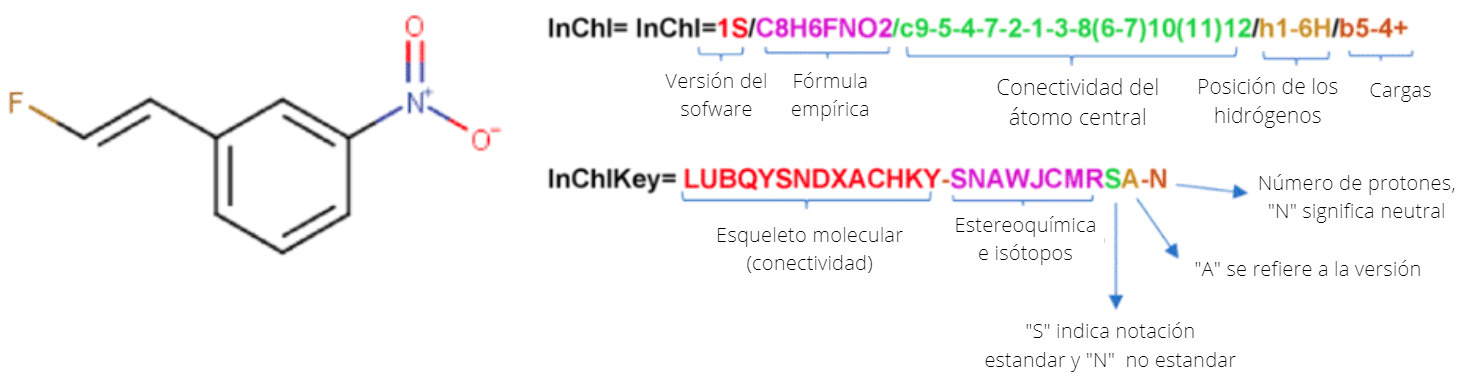


Imágen traducida de https://doi.org/10.1186/s13321-020-00466-z


# **Ejercicios resueltos**

---


Los siguientes ejercicios son una introducción para que los usuarios puedan comprender y extrapolar los conocimientos teóricos, utilizar representaciones lineales para transformarlas a estructuras bidimensionales e incluso tridimiensionales. Además, aprovechar las distintas herramientas que brindan las paqueterías para comparar moléculas, analizar su estructura y aplicarlo a trabajos más complejos como encontrar subestructuturas de interés en bibliotecas químicas.


[**RDKit**](https://www.rdkit.org/)

RDKIt es una paquetería que contiene herramientas de código abierto para la quimioinformática. Sirve para operaciones moleculares 2D y 3D, genera descriptores para machine learning y es sumamente fácil de utilizar, pues no requiere de instalación en el propio dispositivo. Su lenguaje es C++ y puede ser utilizada por Java y Python.

## Convertir SMILES a representaciones 2D




1. Instalar el paquete RDKit.

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 71.6 MB/s eta 0:00:00


2. Importar las siguientes módulos.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

3. Definir la variable  y en el paréntesis colocar el SMILES que se desea visualizar en 2D.

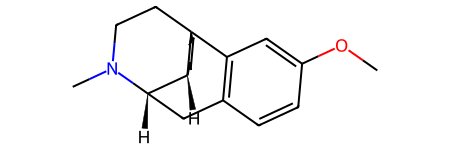

In [ ]:
d = Chem.MolFromSmiles('[H][C@]12CCCC[C@]11CCN(C)[C@H]2CC2=C1C=C(OC)C=C2')
d

## Conversión de la molécula en diferentes tipos de representaciones

En todos los casos debe estar definida la molécula que se desea convertir, en este caso d.

In [ ]:
Chem.MolToSmiles(d)

'COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3'

In [ ]:
Chem.MolToSmarts(d)

'[#6]1-[#6@H]2-[#6@]3(-[#6]-[#6]-[#6]-1)-[#6]-[#6]-[#7](-[#6])-[#6@H]-2-[#6]-[#6]1:[#6]-3:[#6]:[#6](-[#8]-[#6]):[#6]:[#6]:1'

In [ ]:
Chem.MolToInchiKey(d)

'MKXZASYAUGDDCJ-NJAFHUGGSA-N'

Para saber el número de átomos, utilizar la siguiente función.

In [ ]:
d.GetNumAtoms()

20

En caso de determinar qué átomos están fuera del anillo, utilizar la siguiente función.

In [ ]:
[atom.GetSymbol() for atom in d.GetAtoms() if not atom.IsInRing()]

['C', 'O', 'C']

Para visualizar los hidrógenos explícitamente, utilizar la siguiente función.

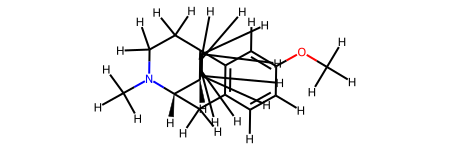

In [ ]:
d_with_hydrogens = Chem.AddHs(d)
d_with_hydrogens

## Estereoquímica en la representación 2D

En las siguientes funciones, la primera enumera a los átomos y la segunda le da estereoquímica a los compuestos.


In [ ]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

Definir las moléculas y en el paréntesis colocar su SMILES.

In [ ]:
m1 = Chem.MolFromSmiles('C[C@H]1CCC[C@@H](C)[C@@H]1Cl')
m2 = Chem.MolFromSmiles('[H][C@@]1(OC(=O)C(O)=C1O)[C@@H](O)CO')


Indicar qué moléculas se busca ver y definir su tamaño.

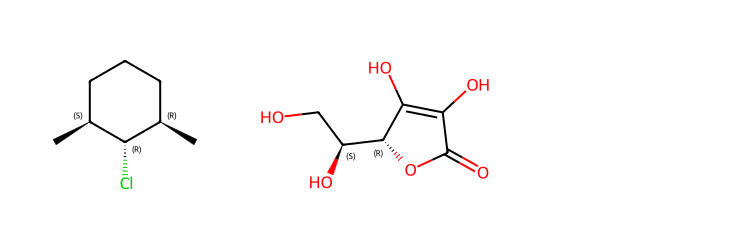

In [ ]:
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

## Hacer una lista con SMILES

1. Utilizar la función escrita y dentro de los corchetes colocar las estructuras que se quiera visualizar separadas por comas.

In [ ]:
smiles_list = ['CC1=CC=C(C=C1)S(=O)(=O)NC(=O)NN1CCCCCC1', 'N[C@@H](CCC(O)=O)C(O)=O', 'CCN(CC)CC#CCOC(=O)C(O)(C1CCCCC1)C1=CC=CC=C1']

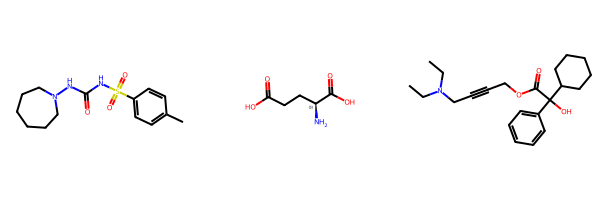

In [ ]:
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list)
img

Nota: para definir la cantidad de compuestos por fila, se utiliza molsPerRow=n.

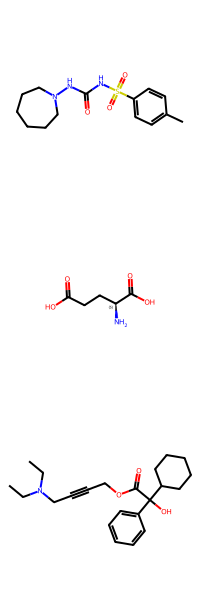

In [ ]:
img = Draw.MolsToGridImage(mol_list, molsPerRow=1)
img

Para encontrar subestructuras en la lista:
1. Definir el *pattern* que se busca en los compuestos expresado como SMILES.
2. Utilizar las funciones descritas.

In [ ]:
pattern = Chem.MolFromSmiles ('C(=O)')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
True
True


Los tres compuestos poseen un grupo carbonilo.

## Importar moléculas

1. Ingresar a DrugBank, en la sección de identification descargar el formato MOL del compuesto y obtener el URL.
2. Importar la herramienta necesaria.

In [ ]:
import requests

3. Definir la variable con el URL obtenido.

In [ ]:
#From DrugBank
dextromethorphan_url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB00514.mol'

In [ ]:
#From PubChem
dextromethorphan_url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/5360696/record/SDF?record_type=2d&response_type=display'

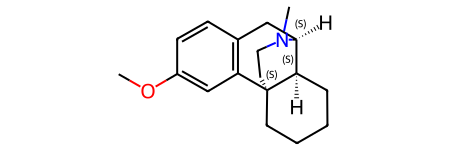

In [ ]:
dextromethorphan_url = requests.get(dextromethorphan_url).text
dextromethorphan = Chem.MolFromMolBlock(dextromethorphan_url)
dextromethorphan

## Visualizar en 3D

Para lograr esta visualización es necesario realizar el paso anterior, ya que de esa forma se obtienen los compuestos con coordenadas específicas.



In [ ]:
from rdkit.Chem import AllChem
AllChem.EmbedMolecule(dextromethorphan)

[17:39:53] Molecule does not have explicit Hs. Consider calling AddHs()


0

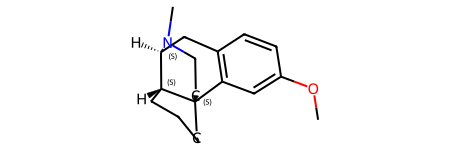

In [ ]:
dextromethorphan

Para ver también a los hidrógenos, se utiliza la herramienta AddHS.

In [ ]:
dextromethorphan_3DH = Chem.AddHs(dextromethorphan)
AllChem.EmbedMolecule(dextromethorphan_3DH)


0

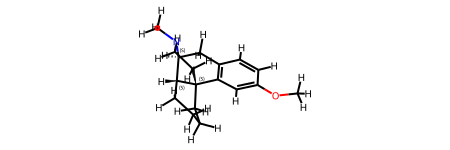

In [ ]:
dextromethorphan_3DH

**Moléculas 3D usando py3Dmol**

1. Instalar los siguientes módulos de `RDKit `y la paquetería `py3Dmol`.

In [ ]:
!pip install py3Dmol

In [ ]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
from IPython.display import Image
import py3Dmol


2. Definir la molécula a visualizar mediante su SMILES, en este caso miglitol.

In [ ]:
m3 = Chem.MolFromSmiles('CN1CC[C@@]23CCCC[C@@H]2[C@@H]1CC4=C3C=C(C=C4)OC')

3. El módulo rdDistGeom coordina los átomos computacionalmente en 3D usando geometría y el argumento clearConfs limpia todas las conformaciones existentes de la molécula.

In [ ]:
ps = rdDistGeom.ETKDGv3()
ps.clearConfs= False
cid = rdDistGeom.EmbedMolecule(m3,ps)


[17:47:13] Molecule does not have explicit Hs. Consider calling AddHs()


4. Definir especificaciones de la imagen, como tamaño y capacidad de hacerle zoom a la imágen.

In [ ]:
v = py3Dmol.view(width=300,height=300)
v.removeAllModels()
IPythonConsole.addMolToView(m3,v,confId=cid)
v.zoomTo()
v.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

5. Para ver la representación 2D y 3D al mismo tiempo, utilizar los dos códigos al mismo tiempo.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

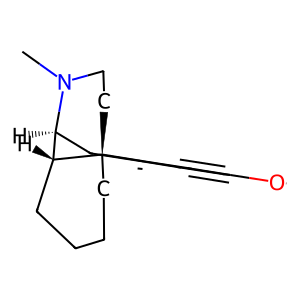

In [ ]:
v.show()
display(Draw.MolToImage(m3))

**Visualizar en forma de esferas**

In [ ]:
def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)   #Agregar Hidrógenos
        AllChem.EmbedMolecule(mol) #Generar conformaciones
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200) #Campo de fuerza
        return mol
    else:
        return None

In [ ]:
smiles = 'COc3nc(OCc2ccc(C#N)c(c1ccc(C(=O)O)cc1)c2P(=O)(O)O)ccc3C[NH2+]CC(I)NC(=O)C(F)(Cl)Br'

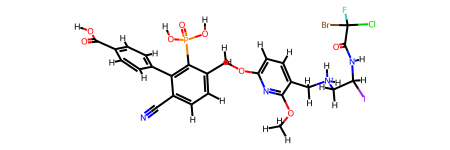

In [ ]:
smi2conf(smiles)

In [ ]:
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D

    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

In [ ]:
conf = smi2conf(smiles)
viewer = MolTo3DView(conf, size=(600, 300), style='sphere')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Visualización de SMARTS


Necesita tener previamente importado Chem.
1. Importar las siguientes funciones.



In [ ]:
from IPython.display import Image
import requests
import urllib

2. Con ayuda de la herramienta [SMARTS plus](https://smarts.plus/rest), configurar el URL de acuerdo a lo que se busca visualizar.

In [ ]:
baseurl = "https://smarts.plus/smartsview/download_rest?smarts=[CX3](=[OX1])[OX2][CX3](=[OX1]);textdesc=0;depsymbols=0;smartsheading=0"

In [ ]:
def get_img(query):
    url = baseurl+query
    res = requests.get(url)
    return Image(res.content)

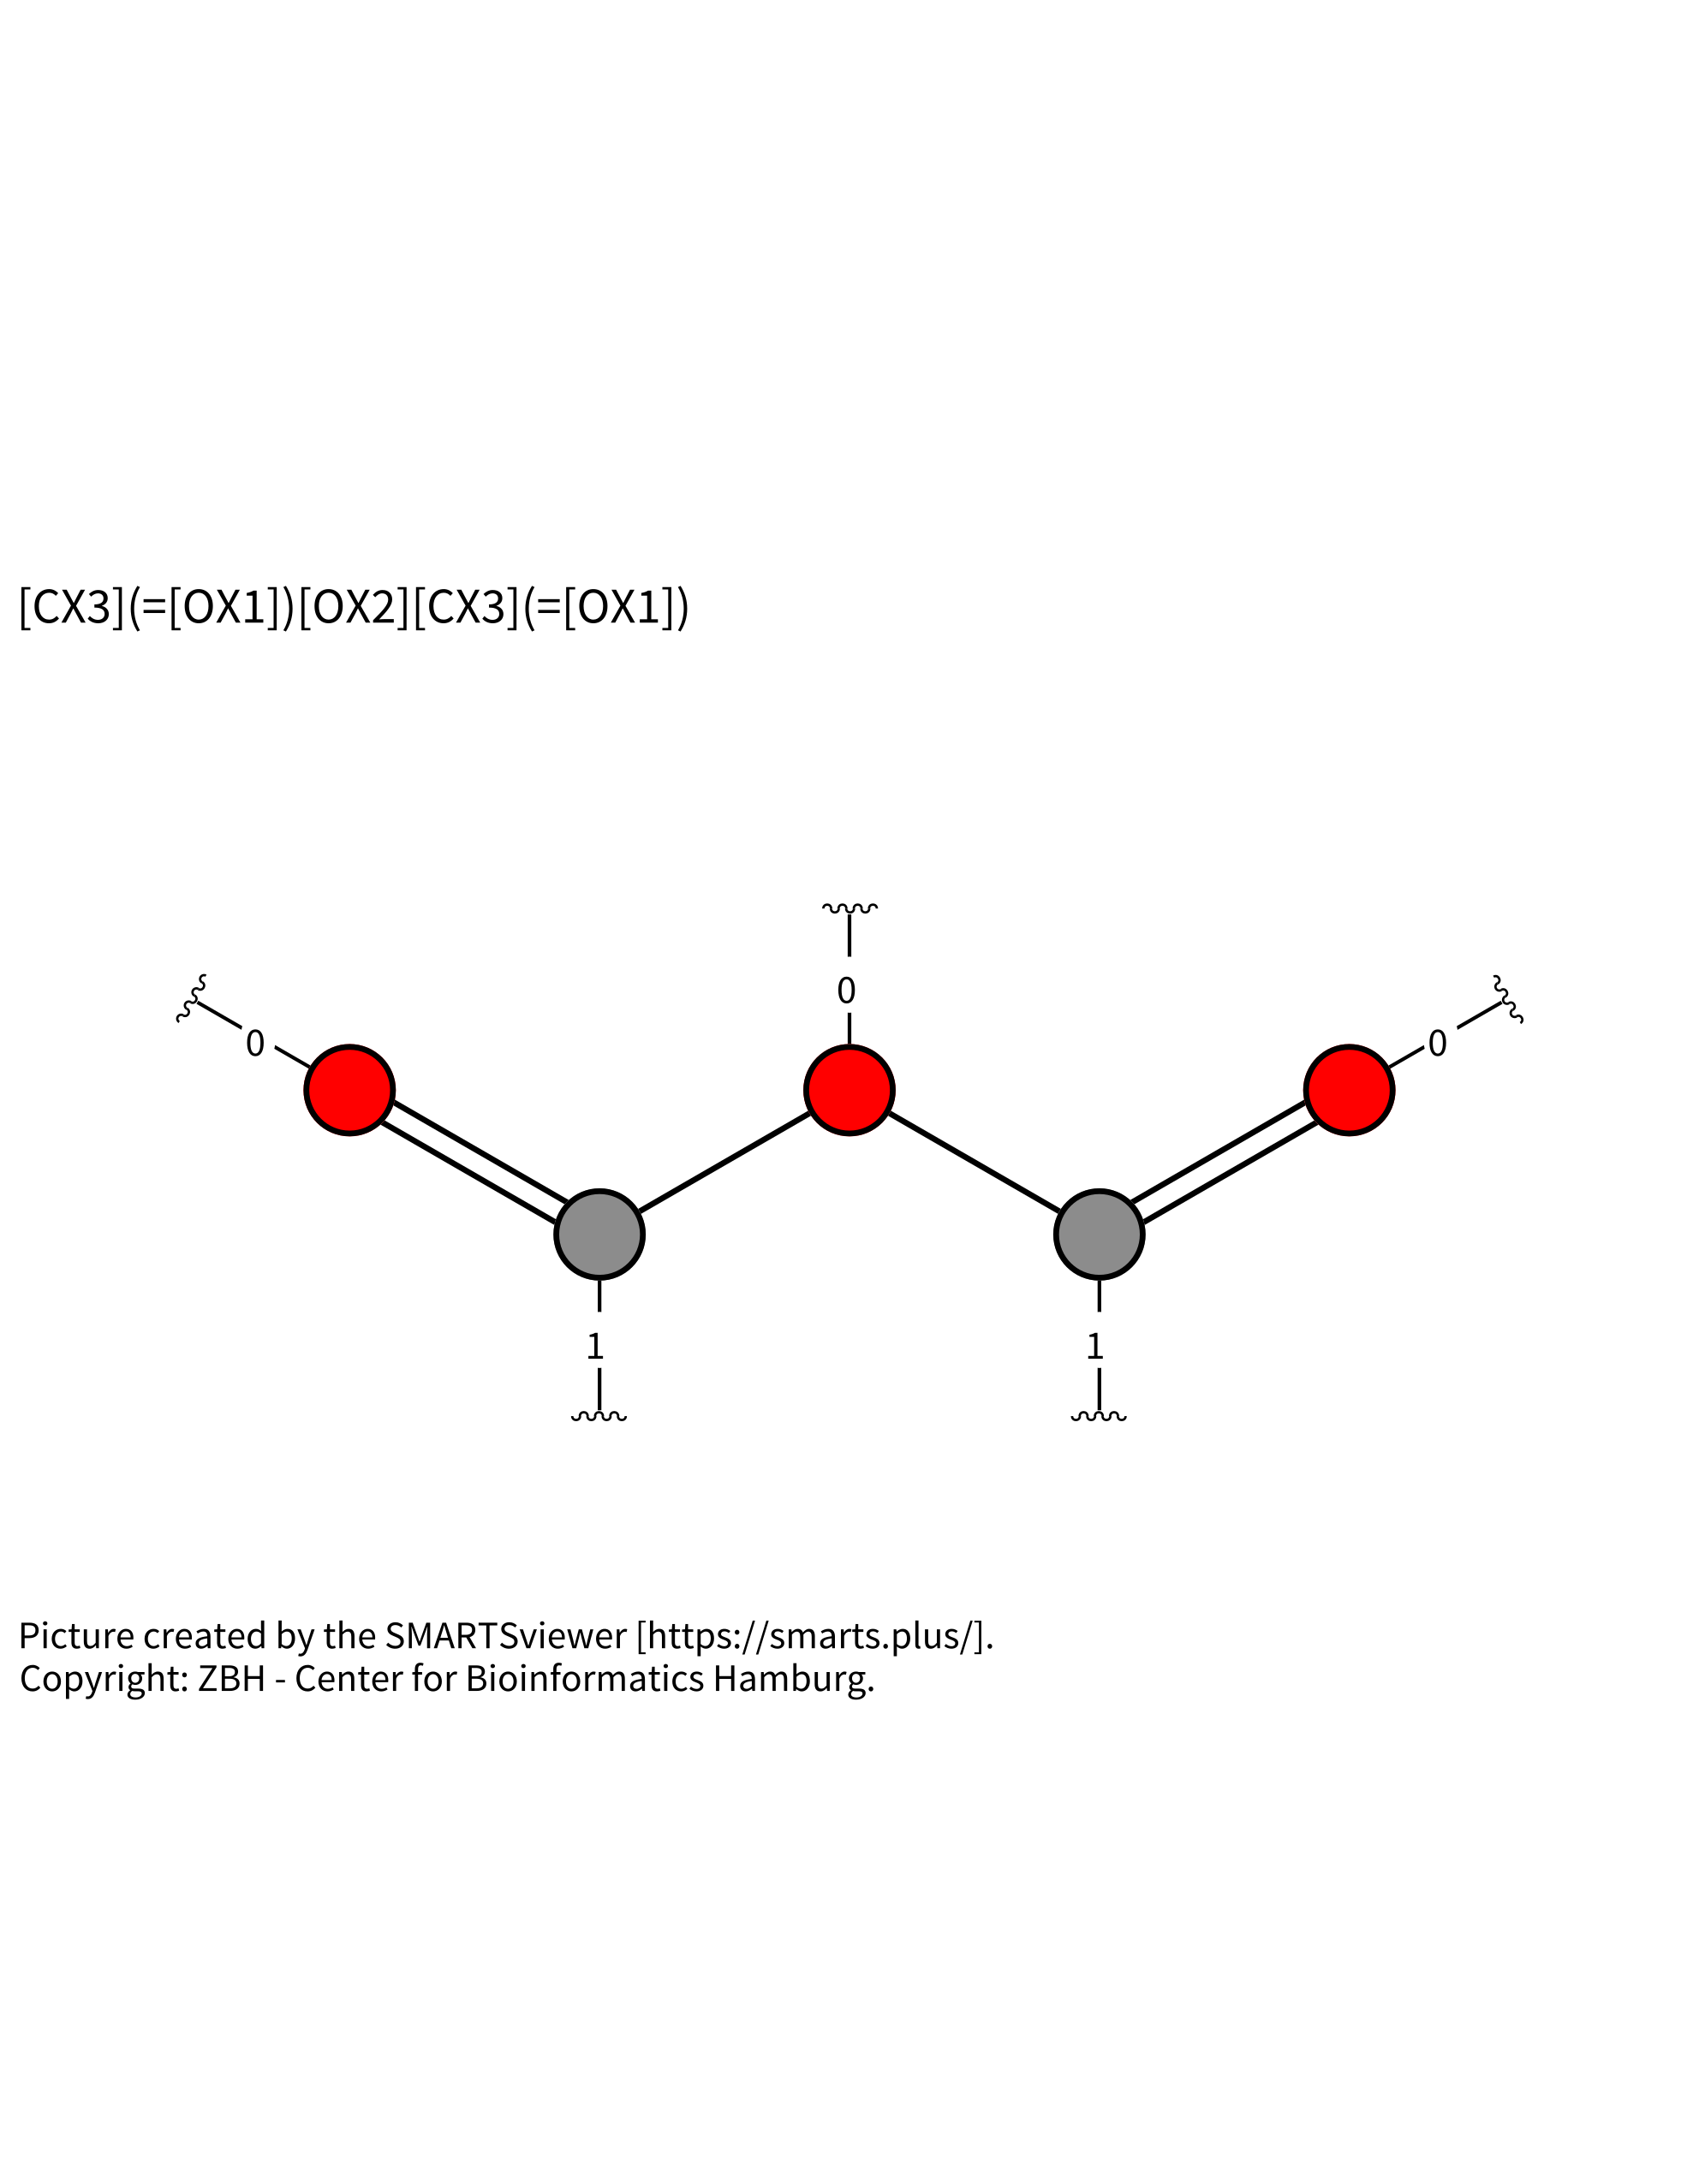

In [ ]:
im1 = get_img("smarts = [CX3](=[OX1])[OX2][CX3](=[OX1]")
im1

## Resaltar subestructuras con SMARTS

1. Definir a la variable y en el paréntesis se coloca el SMILES del compuesto.


In [ ]:
m = Chem.MolFromSmiles('CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C=C3)O2)C(C)=C1O')

2. Determinar la subestructura que se desea resaltar y colocarla en el paréntesis.

In [ ]:
substructure = Chem.MolFromSmarts('C(=O)')
print(m.GetSubstructMatches(substructure))

((19, 20), (22, 23))


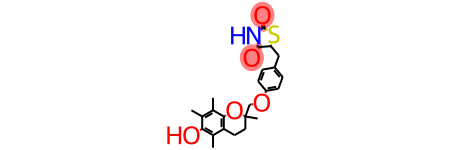

In [ ]:
m

La subestructura se resalta en color rojo y también textualmente se indica el número de átomos correspondiente.

Resaltar una subestructura de interés en una lista de compuestos

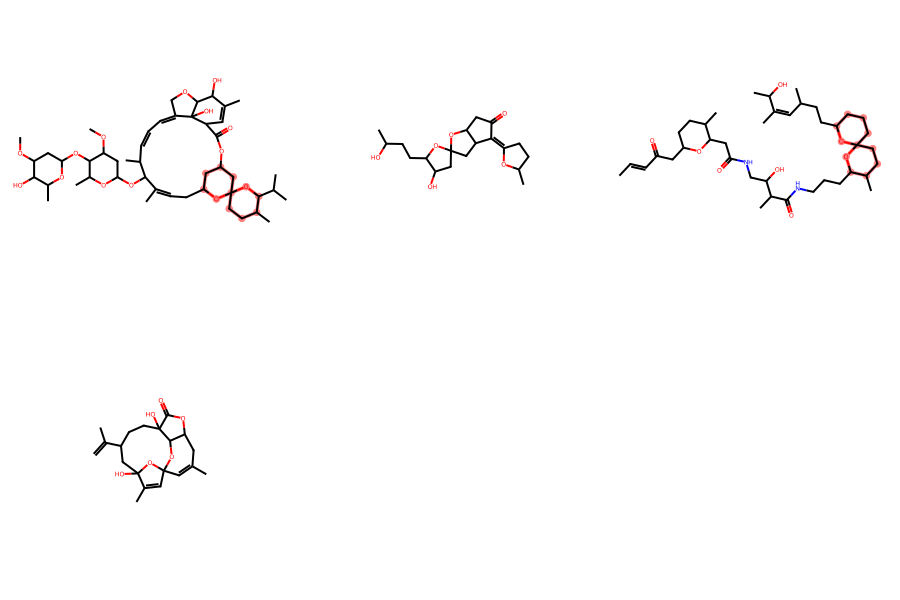

In [ ]:
smiles_list = ['CC1CCC2(CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(C=C(C5O)C)C(=O)O3)O)C)OC6CC(C(C(O6)C)OC7CC(C(C(O7)C)O)OC)OC)C)OC1C(C)C', 'CC1CCC(=C2C3CC4(CC(C(O4)CCC(C)O)O)OC3CC2=O)O1','CC=CC(=O)CC1CCC(C(O1)CC(=O)NCC(C(C)C(=O)NCCCC2C(CCC3(O2)CCCC(O3)CCC(C)C=C(C)C(C)O)C)O)C', 'CC1=CC23C=C(C(O2)(CC(CCC4(C(O3)C(C1)OC4=O)O)C(=C)C)O)C']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

pattern = Chem.MolFromSmarts ('[*]~1~[*]~[*]C2([*]~[*]~[*]~[#6]-[#8]2)[#8]-[#6]~1') #spiroacetal [6,6]

img = Draw.MolsToGridImage( mol_list, subImgSize=(300,300), molsPerRow=3, highlightAtomLists=[ mol.GetSubstructMatch(pattern) for mol in mol_list], useSVG=True )
img

Nota: Para leer más sobre el papel biológico de los acetales bicíclicos, consulte la siguiente referencia: [Org. Biomol. Chem., 2019, 17, 1037–1052](https://pubs.rsc.org/en/content/articlelanding/2018/ob/c8ob02808g/unauth).

Ejercicio adicional.

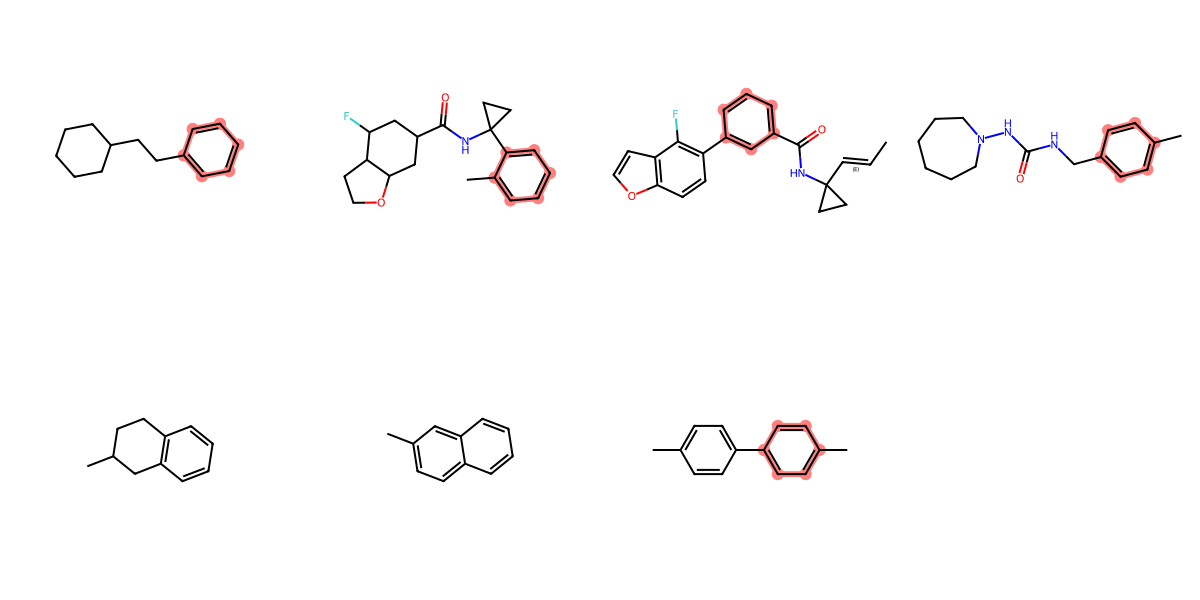

In [ ]:
#Check SMARTS
smiles_list2 = ['C(CC1=CC=CC=C1)C1CCCCC1', 'CC1=CC=CC=C1C1(CC1)NC(=O)C1CC2OCCC2C(F)C1', 'C\C=C\C1(CC1)NC(=O)C1=CC=CC(=C1)C1=C(F)C2=C(OC=C2)C=C1','CC1=CC=C(CNC(=O)NN2CCCCCC2)C=C1', 'CC1CCC2=C(C1)C=CC=C2','CC1=CC=C2C=CC=CC2=C1',  'CC1=CC=C(C=C1)C1=CC=C(C)C=C1' ]
#'CCCC1=CC(CC)=CC(C)=C1'
mol_list2 = []
for smiles in smiles_list2:
  mol = Chem.MolFromSmiles(smiles)
  mol_list2.append(mol)



pattern2 = Chem.MolFromSmarts ('[c;x2]1[c;x2:1][c;x2][c;x2:2][c;x2][c;x2]1')

#pattern2 = Chem.MolFromSmarts ('[c;D2]1[c;x2:2][c;x2:3][c;x2:4][c;x2:5][c;x2:1]1')
img2 = Draw.MolsToGridImage( mol_list2, subImgSize=(300,300), molsPerRow=4, highlightAtomLists=[mol.GetSubstructMatch(pattern2) for mol in mol_list2], useSVG=True )
img2

Ejercicio: Modificar el SMARTS de búsqueda para que identifique por separado  grupos fenilos sustituidos en posición orto, meta y para.

Phenyl_orto:

Phenyl_meta:

Phenyl_para:




## Comparar compuestos con SMARTS

1. Se necesita tener las siguientes herramientas importadas.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor


2. Para favorecer la visualización de las moléculas se utiliza la primera función y posteriormente se define el tamaño de la imagen.

In [ ]:
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=25

2. Definir las moléculas a comparar.

In [ ]:
mol1 = Chem.MolFromSmiles('CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O')
mol2 = Chem.MolFromSmiles('CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C')



3. Establecer qué moléculas se van a comparar.

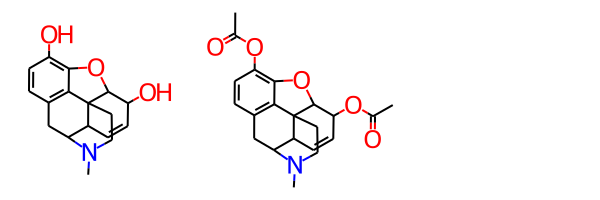

In [ ]:
Draw.MolsToGridImage([mol1, mol2])

In [ ]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

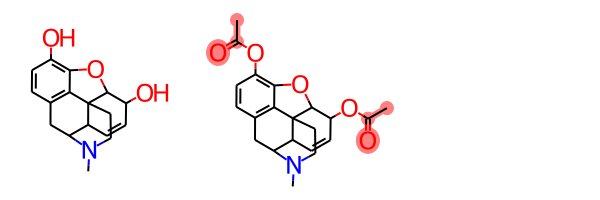

In [ ]:
view_difference(mol1,mol2)

Las diferencias se resaltan en color rojo.

Nota: Útil para el análisis de análogos estructurales y en procesos de optimización de fármacos. [ACS Omega 2019, 4, 1, 1027–1032](https://pubs.acs.org/doi/10.1021/acsomega.8b03390)

## Identificar alertas subestructurales

In [ ]:
# Unwanted substructures
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)

catalog = FilterCatalog(params)
mol = Chem.MolFromSmiles('O=C(Cn1cnc2c1c(=O)n(C)c(=O)n2C)N/N=C/c1c(O)ccc2c1cccc2')
entry = catalog.GetFirstMatch(mol)
print (entry.GetProp('Scope'))
print (entry.GetDescription())

PAINS filters (family A)
hzone_phenol_A(479)


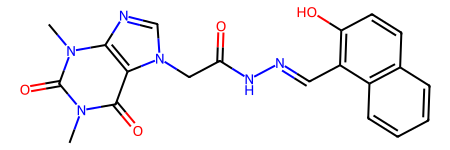

In [ ]:
mol

Note: Para leer más sobre PAINS, consulte la siguiente referencia. [*J. Med. Chem.* 2010, 53, 7, 2719–2740](https://pubs.acs.org/doi/10.1021/jm901137j)



## Trabajo con bases de datos

Descargar una base de datos, encontrar una subestructura en la lista mediante SMARTS y dibujas las moléculas que correspondan a la descripción.

Importar las siguientes herramientas.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import rdkit
from rdkit.Chem import PandasTools

In [ ]:
from rdkit import RDConfig
import os

Importar la base de datos en formato csv.

In [ ]:
df = pd.read_csv('/content/africa.csv', delimiter=",")


In [ ]:
df

,SMILES,ID,Database
0,CC1=C(C(=O)C=C2C1=CC=C3[C@]24C[C@H]4C[C@@]56[C...,17.3.1.11.13,AfroDb
1,C[C@@H]1Cc2ccc(c(c2[C@H](N1)C)O)c3c4cccc(c4c(c...,17.3.1.17.16,AfroDb
2,Cc1cc(c2c(c1c3ccc4c(c3O)[C@H](N[C@@H](C4)C)C)c...,17.3.1.17.17,AfroDb
3,Cc1cc2c(ccc(c2c(c1)OC)O)c3ccc(c4c3C[C@H](N[C@@...,17.3.1.17.19,AfroDb
4,Cc1cc2c(cc(c(c2c(c1)OC)O)c3cc(c4cc(cc(c4c3O)OC...,17.3.1.17.20,AfroDb
...,...,...,...
949,Cc1cc2c(cc(c(c2c(c1)OC)O)c3cc(c4cc(cc(c4c3O)OC...,NPR_0003,AfroDb
950,CC(=CCOc1cc2cc3c(c(c2c(c1)O)O)C(=O)C[C@@](C3)(...,NPR_00071,AfroDb
951,CC(=CC[C@H]1C[C@]2(C(=C(C(=O)[C@](C2=O)([C@]1(...,NPR_00075,AfroDb
952,CC(=CCc1c2c(cc(c1OC)O)oc3cc4c(cc3c2=O)cc(o4)C(...,NPR_00076,AfroDb


In [ ]:
mol_list = []
for smiles in df:
    for smiles in df['SMILES']:
        mol = Chem.MolFromSmiles(smiles)
        mol_list.append(mol)


In [ ]:
IPythonConsole.drawOptions.addStereoAnnotation = False

In [ ]:
df.head(3)

,SMILES,ID,Database
0,CC1=C(C(=O)C=C2C1=CC=C3[C@]24C[C@H]4C[C@@]56[C...,17.3.1.11.13,AfroDb
1,C[C@@H]1Cc2ccc(c(c2[C@H](N1)C)O)c3c4cccc(c4c(c...,17.3.1.17.16,AfroDb
2,Cc1cc(c2c(c1c3ccc4c(c3O)[C@H](N[C@@H](C4)C)C)c...,17.3.1.17.17,AfroDb


In [ ]:
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Molecule',includeFingerprints=True)
print([str(x) for x in  df.columns])

['SMILES', 'ID', 'Database', 'Molecule']


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


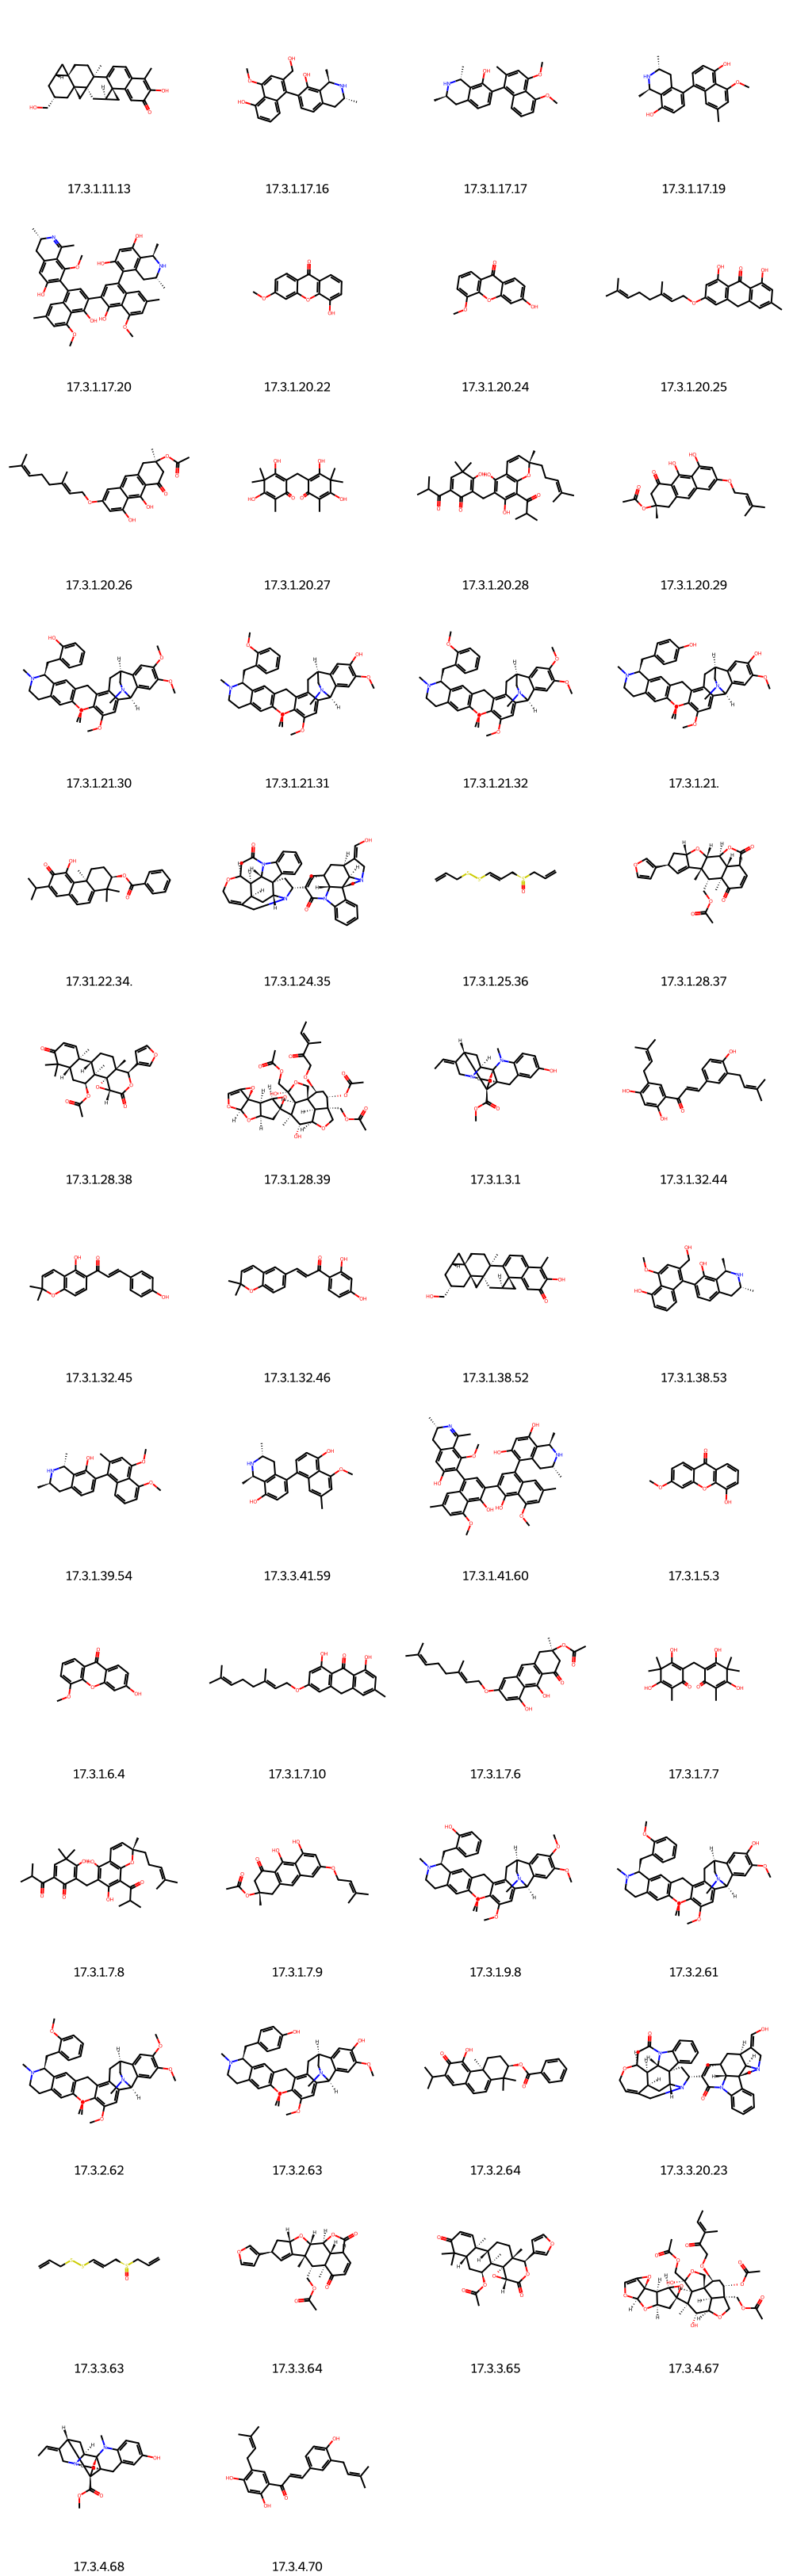

In [ ]:
PandasTools.FrameToGridImage(df,column= 'Molecule', molsPerRow=4,subImgSize=(250,250),legendsCol="ID")

Definir qué subestructura encontrar en la lista y transformarla a SMARTS, en este caso quinolina, pues se relaciona como subestructura de compuestos con actividad antipalúdica.

In [ ]:
q= Chem.MolFromSmiles('C1=CC=C2C(=C1)C=CC=N2')
Chem.MolToSmarts (q)

'[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:1):[#6]:[#6]:[#6]:[#7]:2'

Para los siguientes pasos es necesario utilizar la libreria en formato sdf.

In [ ]:
supp = Chem.SDMolSupplier('/content/africa.sdf')
for mol in supp:
  if mol is not None: mol.GetNumAtoms()

Con la siguiente función se cuenta el número total de compuestos de la librería.

In [ ]:
mols = [x for x in supp]
len(mols)

954

Poner dentro del paréntesis la subestructura  a buscar en formato SMARTS.




In [ ]:
patt= Chem.MolFromSmarts('[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:1):[#6]:[#6]:[#6]:[#7]:2')
quin = [x for x in mols if x.HasSubstructMatch(patt)]

In [ ]:
quin

Con esta función se cuenta el número de compuestos con la subestructura definida al principio, quinolina.

In [ ]:
len(quin)


39

Dibujar las estructuras con quinolina como subestructura.

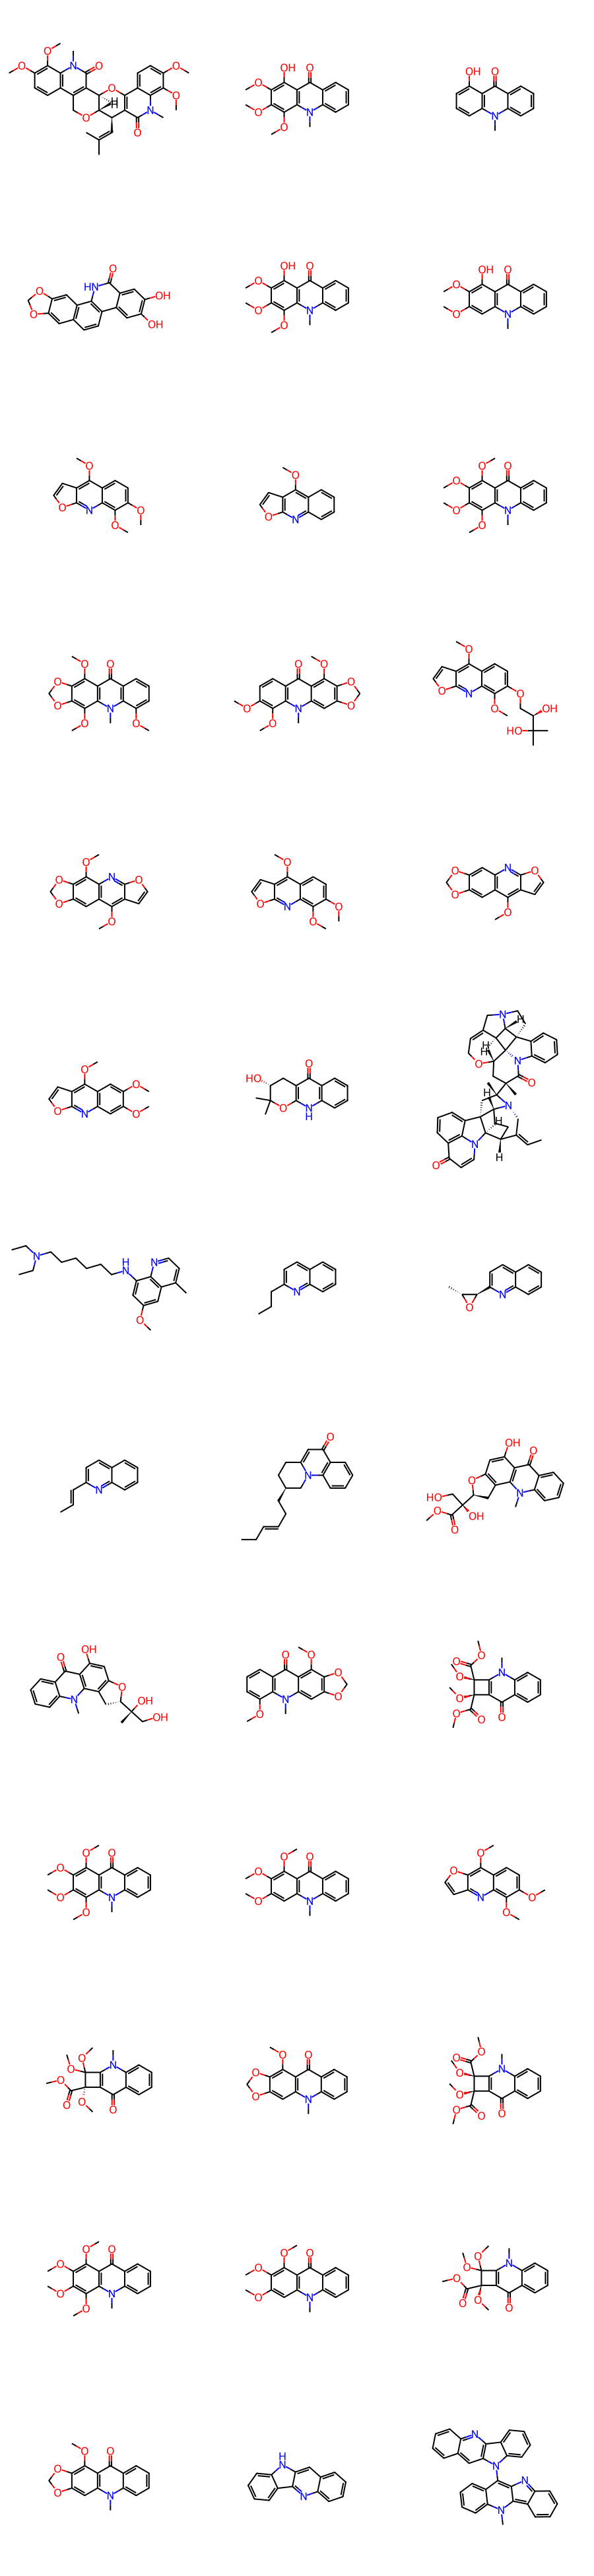

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(quin), subImgSize=(300,300))


Para saber más:

* Saldívar-González, F.I., Huerta-García, C.S. & Medina-Franco, J.L. (2020) [Chemoinformatics‐based enumeration of chemical libraries: a tutorial.](https://doi.org/10.1186/s13321-020-00466-z) *J.Cheminform.* 12,64.


* Universität Hamburg (s/f) SMARTSviewer and SMARTScompareViewer automatic visualization retrieving. Recuperado el  22 de junio del 2022 de: https://smarts.plus/rest.


* Iwatobipen (2022) Easy way to visualiza SMARTS. Recuperado el 23 de junio del 2022 de: https://iwatobipen.wordpress.com/2022/02/14/easy-way-to-visualize-smarts-chemoinformatics-memo/.


* Landrum, G. (2021) rdkit.Chem.rdmolfiles module. Recuperado el 23 de junio del 2022 de:  https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html.

* Landrum, G. (2021) Getting Started with de RDKit in Python. Recuperado el 21 de junio del 2022 de: https://www.rdkit.org/docs/GettingStartedInPython.html.

* Landrum, G. (2021) RDKit Cookbook. Recuperado el 21 de junio del 2022 de: https://www.rdkit.org/docs/Cookbook.html.


* Raghunathan, S. & Deva, U. (2021) [Molecular representations for machine learning applications in chemistry](https://doi.org/10.1002/qua.26870). *Int. J. Quantum Chem.*, 12(7)

* Capecchi, A., Probst, D. & Reymond, JL.(2020) [One molecular fingerprint to rule them all: drugs, biomolecules, and the metabolome](https://doi.org/10.1186/s13321-020-00466-z). *J. Cheminform.* 12, 43.

* Probst, D. & Reymond, JL. (2018) [SmilesDrawer: Parsing and Drawing SMILES-Encoded Molecular Structures Using Client-Side JavaScript](https://doi.org/10.1021/acs.jcim.7b00425). *J. Cheminform.* 58 (1), 1-7.

* Daylight Chemical Information Systems (2006) Daylight Theory Manual. Recuperado el 26 de junio del 2022 de: https://www.ics.uci.edu/~dock/manuals/DaylightTheoryManual/index.html.

* Daylight Chemical Information Systems (2019) SMARTS - A Language for Describing Molecular Patterns. Recuperado el 28 de junio del 2022 de: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html.

* Heller, S.R., McNaught, A., Pletnev, I. et al. (2015) [InChI, the IUPAC International Chemical Identifier.](https://doi.org/10.1186/s13321-015-0068-4) *J. Cheminform.* 7, 23.

* Daylight Chemical Information Systems (2019) SMILES - A Simplified Chemical Language. Recuperado el 28 de junio del 2022 de: https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html.


* Landrum, G. (2022) View 2D and 3d simultaneously.ipynb. Recuperado el 4 de agosto del 2022 de: https://gist.github.com/greglandrum/7bc0489e30e9ccec8f6af6b86a5bb993.

* Py3Dmol in Jupyter (2019). Recuperado el 5 de agosto de https://birdlet.github.io/2019/10/02/py3dmol_example/.